In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Qyelp = pd.read_json("C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/dataset-extraction/thousand.json")
#Qyelp = pd.read_json("C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/tenthousand.json")

In [3]:
# original stars (first 1000 reviews)
urlOrig = "C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/dataset-extraction/thousand.json"
Qyelp = pd.read_json(urlOrig)

# normalized stars (first 1000 reviews)
urlSent = "C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/sentiment-api-results/google_results.json"
Qsent = pd.read_json(urlSent)

# sentiment analysis (first 1000 reviews)
urlNorm = "C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/stat-analysis/user_normalizedStars.json"
Qnorm = pd.read_json(urlNorm)

In [4]:
QyelpAdj = pd.concat([Qyelp, Qsent['sentiment-google']], axis=1)
QyelpAdj = QyelpAdj.rename(columns={'sentiment-google': 'sentiment'})
QyelpAdj.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,-0.1
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7


In [5]:
def normalizeValue(minVal, maxVal, val):
    rangeVal = maxVal - minVal
    return (val - minVal) / rangeVal

In [6]:
for star in range(1,6):
    qtemp = QyelpAdj[Qyelp['stars'] == star]['sentiment']
    
    maxSent = qtemp.max()
    minSent = qtemp.min()
    QyelpAdj.loc[Qyelp['stars'] == star, 'sentStars'] = star + normalizeValue(minSent, maxSent, qtemp) - 0.5

QyelpAdj.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,sentStars
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,-0.1,1.944444
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,5.318182


In [7]:
Qyelp = QyelpAdj

In [8]:
# Create metrics per user
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
DAvg = Qyelp.groupby('user_id')['sentStars'].mean().to_dict()
DMed = Qyelp.groupby('user_id')['sentStars'].median().to_dict()
DMin = Qyelp.groupby('user_id')['sentStars'].min().to_dict()
DMax = Qyelp.groupby('user_id')['sentStars'].max().to_dict()
DStd = Qyelp.groupby('user_id')['sentStars'].std().to_dict()

QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.208333,1.859257,5.318182,3.022727,0.750000
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545
2,NhOc64RsrTT1Dls50yYW8g,2,3.121212,3.235549,5.409091,3.121212,0.833333
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636


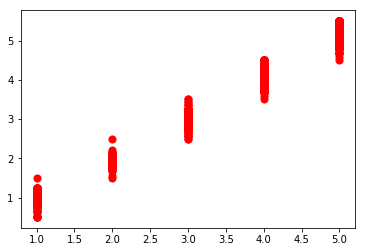

In [10]:
plt.scatter(Qyelp['stars'], Qyelp['sentStars'], s=50, color='red')
plt.show()

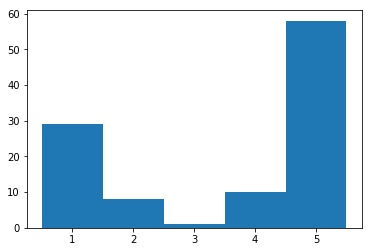

In [11]:
plt.hist(QDist[QDist['Reviews'] == 1]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

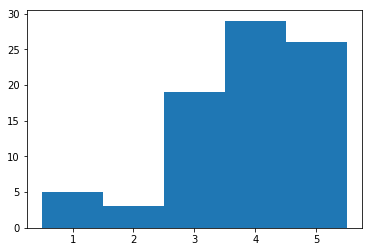

In [12]:
plt.hist(QDist[QDist['Reviews'] >= 2]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

In [502]:
#for user in QDist[QDist['Reviews']>1]['user_id']:
#    plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
#    plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
#    plt.show()

In [13]:

QDist.head(5)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.208333,1.859257,5.318182,3.022727,0.750000
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545
2,NhOc64RsrTT1Dls50yYW8g,2,3.121212,3.235549,5.409091,3.121212,0.833333
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636


In [14]:
Qyelp['Mean'] = Qyelp['user_id'].map(DAvg)
Qyelp['Std'] = Qyelp['user_id'].map(DStd)
Qyelp['Count'] = Qyelp['user_id'].map(DCount)
Qyelp['T-score'] = (Qyelp['sentStars'] - Qyelp['Mean']) / (Qyelp['Std'])# / np.sqrt(Qyelp['Count']) )
Qyelp.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,sentStars,Mean,Std,Count,T-score
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,-0.1,1.944444,3.208333,1.859257,10,-0.679782
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,5.318182,3.208333,1.859257,10,1.134780
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,-0.3,1.000000,3.208333,1.859257,10,-1.187750
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,-0.2,1.888889,3.208333,1.859257,10,-0.709662
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,5.318182,3.208333,1.859257,10,1.134780


In [15]:
print("Users with average review between 2.5 and 3.5: %d" % len(Qyelp[(Qyelp['Mean'] < 3.5) & (Qyelp['Mean'] > 2.5)]['user_id'].unique()))
print("Users with average review above 3.5: %d" % len(Qyelp[Qyelp['Mean'] > 3.5]['user_id'].unique()))
print("Users with average review below 2.5: %d" % len(Qyelp[Qyelp['Mean'] < 2.5]['user_id'].unique()))

Users with average review between 2.5 and 3.5: 20
Users with average review above 3.5: 123
Users with average review below 2.5: 45


In [16]:
# Create metrics per user
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
D1 = Qyelp.groupby('user_id')['stars'].mean().to_dict()
D2 = Qyelp.groupby('user_id')['stars'].median().to_dict()
D3 = Qyelp.groupby('user_id')['stars'].min().to_dict()
D4 = Qyelp.groupby('user_id')['stars'].max().to_dict()
D5 = Qyelp.groupby('user_id')['stars'].std().to_dict()

QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.208333,1.859257,5.318182,3.022727,0.750000
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545
2,NhOc64RsrTT1Dls50yYW8g,2,3.121212,3.235549,5.409091,3.121212,0.833333
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636


In [17]:
StarCounts = pd.crosstab(Qyelp['user_id'], Qyelp['stars']).reset_index()

QCounts = QDist.merge(StarCounts, how="left", on="user_id")
QCounts.head(5)


,user_id,Reviews,Mean,Std Dev,Max,Median,Min,1,2,3,4,5
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.208333,1.859257,5.318182,3.022727,0.750000,2,3,0,1,4
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545,0,0,0,0,1
2,NhOc64RsrTT1Dls50yYW8g,2,3.121212,3.235549,5.409091,3.121212,0.833333,1,0,0,0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000,0,0,0,1,0
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636,0,0,0,0,1


In [18]:
QCounts['Mode1'] = (QCounts[1] > QCounts[2]).astype(int)
QCounts['Mode2'] = ((QCounts[2] > QCounts[1]) & (QCounts[2] > QCounts[3])).astype(int)
QCounts['Mode3'] = ((QCounts[3] > QCounts[2]) & (QCounts[3] > QCounts[4])).astype(int)
QCounts['Mode4'] = ((QCounts[4] > QCounts[3]) & (QCounts[4] > QCounts[5])).astype(int)
QCounts['Mode5'] = (QCounts[5] > QCounts[4]).astype(int)

QCounts['Modal'] = QCounts['Mode1'] + QCounts['Mode2'] + QCounts['Mode3'] + QCounts['Mode4'] + QCounts['Mode5']
QCounts.head(5)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min,1,2,3,4,5,Mode1,Mode2,Mode3,Mode4,Mode5,Modal
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.208333,1.859257,5.318182,3.022727,0.750000,2,3,0,1,4,0,1,0,0,1,2
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545,0,0,0,0,1,0,0,0,0,1,1
2,NhOc64RsrTT1Dls50yYW8g,2,3.121212,3.235549,5.409091,3.121212,0.833333,1,0,0,0,1,1,0,0,0,1,2
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000,0,0,0,1,0,0,0,0,1,0,1
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636,0,0,0,0,1,0,0,0,0,1,1


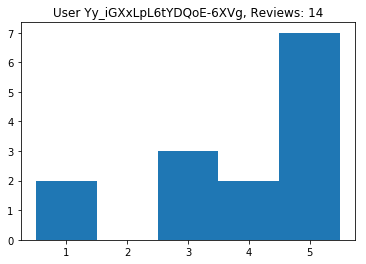

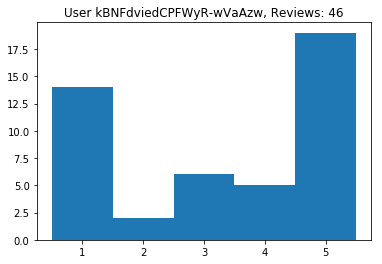

In [509]:
# Tri-Modals
user = 'Yy_iGXxLpL6tYDQoE-6XVg'
plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
plt.show()
user = 'kBNFdviedCPFWyR-wVaAzw'
plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
plt.show()

In [19]:
# put no modals into unimodals
QCounts.loc[QCounts['Modal']==0, 'Modal'] = 1

print('No modals: %i' % len(QCounts[QCounts['Modal']==0]))
print('Unimodals: %i' % len(QCounts[QCounts['Modal']==1]))
print('Bimodals: %i' % len(QCounts[QCounts['Modal']==2]))
print('Trimodals: %i' % len(QCounts[QCounts['Modal']==3]))

No modals: 0
Unimodals: 156
Bimodals: 30
Trimodals: 2


In [20]:
QModal = QCounts.drop(['Mean','Std Dev','Max','Median','Min',1,2,3,4,5,'Mode1','Mode2','Mode3','Mode4','Mode5'], axis=1)
QModal.head(2)

,user_id,Reviews,Modal
0,msQe1u7Z_XuqjGoqhB0J5g,10,2
1,TlvV-xJhmh7LCwJYXkV-cg,1,1


In [65]:
# Split ratings in half for calculations on bimodal users
QyelpHigh = Qyelp[Qyelp['sentStars'] >= 3].drop(['Mean','Std','Count','T-score'], axis=1)
QyelpLow = Qyelp[Qyelp['sentStars'] < 3].drop(['Mean','Std','Count','T-score'], axis=1)

print('There are %d reviews 3 and above' % len(QyelpHigh))
print('There are %d reviews 3 and below' % len(QyelpLow))

There are 692 reviews 3 and above
There are 308 reviews 3 and below


In [66]:
# Create metrics per user
DCountHigh = QyelpHigh.groupby('user_id')['review_id'].count().to_dict()
DAvgHigh = QyelpHigh.groupby('user_id')['sentStars'].mean().to_dict()
DMedHigh = QyelpHigh.groupby('user_id')['sentStars'].median().to_dict()
DMinHigh = QyelpHigh.groupby('user_id')['sentStars'].min().to_dict()
DMaxHigh = QyelpHigh.groupby('user_id')['sentStars'].max().to_dict()
DStdHigh = QyelpHigh.groupby('user_id')['sentStars'].std().to_dict()

QdistHigh = pd.DataFrame(QyelpHigh['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistHigh))
QdistHigh['Reviews'] = QdistHigh['user_id'].map(DCountHigh)
QdistHigh['Mean'] = QdistHigh['user_id'].map(DAvgHigh)
QdistHigh['Std Dev'] = QdistHigh['user_id'].map(DStdHigh)
QdistHigh['Max'] = QdistHigh['user_id'].map(DMaxHigh)
QdistHigh['Median'] = QdistHigh['user_id'].map(DMedHigh)
QdistHigh['Min'] = QdistHigh['user_id'].map(DMinHigh)

QdistHigh.head(5)

Number of Users: 144


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,4.900000,0.520648,5.318182,4.954545,4.045455
1,TlvV-xJhmh7LCwJYXkV-cg,1,4.954545,NaN,4.954545,4.954545,4.954545
2,NhOc64RsrTT1Dls50yYW8g,1,5.409091,NaN,5.409091,5.409091,5.409091
3,LKcdcMrq2xDzIThSHiZmLg,1,4.500000,NaN,4.500000,4.500000,4.500000
4,hxqo4NyJFfeOmuoVi--s1A,1,4.863636,NaN,4.863636,4.863636,4.863636


In [25]:
# Create metrics per user
DCountLow = QyelpLow.groupby('user_id')['review_id'].count().to_dict()
DAvgLow = QyelpLow.groupby('user_id')['sentStars'].mean().to_dict()
DMedLow = QyelpLow.groupby('user_id')['sentStars'].median().to_dict()
DMinLow = QyelpLow.groupby('user_id')['sentStars'].min().to_dict()
DMaxLow = QyelpLow.groupby('user_id')['sentStars'].max().to_dict()
DStdLow = QyelpLow.groupby('user_id')['sentStars'].std().to_dict()

QdistLow = pd.DataFrame(QyelpLow['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistLow))
QdistLow['Reviews'] = QdistLow['user_id'].map(DCountLow)
QdistLow['Mean'] = QdistLow['user_id'].map(DAvgLow)
QdistLow['Std Dev'] = QdistLow['user_id'].map(DStdLow)
QdistLow['Max'] = QdistLow['user_id'].map(DMaxLow)
QdistLow['Median'] = QdistLow['user_id'].map(DMedLow)
QdistLow['Min'] = QdistLow['user_id'].map(DMinLow)

QdistLow.head(5)

Number of Users: 92


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,1.516667,0.593691,2.000000,1.888889,0.750000
1,NhOc64RsrTT1Dls50yYW8g,1,0.833333,NaN,0.833333,0.833333,0.833333
2,5ngpW5tf3ep680eG1HxHzA,1,1.722222,NaN,1.722222,1.722222,1.722222
3,eAavwM32i2h7sNNer--kGw,1,1.000000,NaN,1.000000,1.000000,1.000000
4,Fc_nb6N6Sdurqb-rwsY1Bw,2,1.041667,0.294628,1.250000,1.041667,0.833333


In [26]:
QyelpHigh['MeanHigh'] = QyelpHigh['user_id'].map(DAvgHigh)
QyelpHigh['StdHigh'] = QyelpHigh['user_id'].map(DStdHigh)
QyelpHigh['CountHigh'] = QyelpHigh['user_id'].map(DCountHigh)
QyelpHigh['T-scoreHigh'] = (QyelpHigh['sentStars'] - QyelpHigh['MeanHigh']) / (QyelpHigh['StdHigh'])# / np.sqrt(QyelpHigh['CountHigh']) )
QyelpHigh.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,sentStars,MeanHigh,StdHigh,CountHigh,T-scoreHigh
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,5.318182,4.9,0.520648,5,0.803195
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,5.318182,4.9,0.520648,5,0.803195
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g,0.2,4.863636,4.9,0.520648,5,-0.069843


In [27]:
QyelpLow['MeanLow'] = QyelpLow['user_id'].map(DAvgLow)
QyelpLow['StdLow'] = QyelpLow['user_id'].map(DStdLow)
QyelpLow['CountLow'] = QyelpLow['user_id'].map(DCountLow)
QyelpLow['T-scoreLow'] = (QyelpLow['sentStars'] - QyelpLow['MeanLow']) / (QyelpLow['StdLow'])# / np.sqrt(QyelpLow['CountLow']) )
QyelpLow.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,sentStars,MeanLow,StdLow,CountLow,T-scoreLow
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,-0.1,1.944444,1.516667,0.593691,5,0.720539
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,-0.3,1.000000,1.516667,0.593691,5,-0.870262
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,-0.2,1.888889,1.516667,0.593691,5,0.626963


In [28]:
QyelpLow = QyelpLow.fillna(0)
QyelpHigh = QyelpHigh.fillna(0)

In [29]:
QyelpLow.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'sentiment', 'sentStars', 'MeanLow', 'StdLow',
       'CountLow', 'T-scoreLow'],
      dtype='object')

In [30]:
QAll = Qyelp.merge(QyelpLow, how="left", on=['user_id','business_id', 'cool', 'date', 'funny', 'review_id', 'sentStars', 'stars', 'text', 'useful', 'sentiment'])
QAll = QAll.merge(QyelpHigh, how="left", on=['user_id','business_id', 'cool', 'date', 'funny', 'review_id', 'sentStars', 'stars', 'text', 'useful', 'sentiment'])
QAll = QAll.merge(QModal, how='left', on='user_id')
QAll.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,...,MeanLow,StdLow,CountLow,T-scoreLow,MeanHigh,StdHigh,CountHigh,T-scoreHigh,Reviews,Modal
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,-0.1,...,1.516667,0.593691,5.0,0.720539,NaN,NaN,NaN,NaN,10,2
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,0.7,...,NaN,NaN,NaN,NaN,4.9,0.520648,5.0,0.803195,10,2


In [44]:
QAll['Adj_Stars'] = 0
QAll.loc[QAll['Modal']==1, 'Adj_Stars'] = QAll['T-score'] + 3
QAll.loc[(QAll['Modal']==1) & (QAll['Std']==0) | (QAll['Std'].isnull()), 'Adj_Stars'] = QAll['Mean']
QAll.loc[(QAll['Modal']==1) & (QAll['Reviews']==1), 'Adj_Stars'] = QAll['Mean']
QAll.loc[(QAll['Modal']==2) & (QAll['sentStars']<=3), 'Adj_Stars'] = QAll['T-scoreLow'] / 2 + 2.5
#QAll.loc[(QAll['Modal']==2) & (QAll['stars']==3), 'Adj_Stars'] = (QAll['T-scoreLow'] + QAll['T-scoreHigh']) / 4 + 3
QAll.loc[(QAll['Modal']==2) & (QAll['sentStars']>=3), 'Adj_Stars'] = QAll['T-scoreHigh'] / 2 + 3
QAll.loc[QAll['Modal']==3, 'Adj_Stars'] = QAll['T-score'] + 3
#QAll.loc[QAll['Adj_Stars'] < 1, 'Adj_Stars'] = 1
#QAll.loc[QAll['Adj_Stars'] > 5, 'Adj_Stars'] = 5

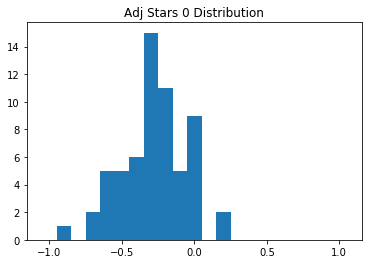

In [97]:
lowStar = 0.5
highStar = 1.5
plt.hist(QAll[(QAll['Adj_Stars']>lowStar) & (QAll['Adj_Stars']<highStar)]['sentiment'], bins=[-1.05,-.95,-.85,-.75,-.65,-.55,-.45,-.35,-.25,-.15,-.05, \
                                                              .05,.15,.25,.35,.45,.55,.65,.75,.85,.95,1.05])
plt.title("Adj Stars %d Distribution" % lowStar)
plt.show()

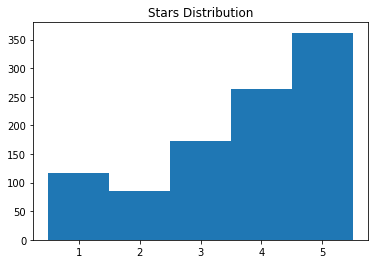

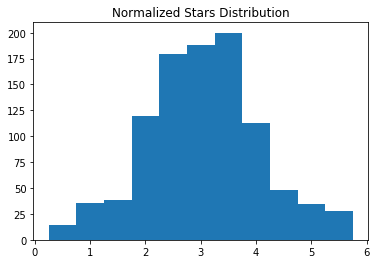

Within 1 StD: 0.685000
Within 2 StD: 0.911000


In [74]:
plt.hist(QAll['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("Stars Distribution")
plt.show()

plt.hist(QAll['Adj_Stars'], bins=[0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75])
plt.title("Normalized Stars Distribution")
plt.show()

std1 = len(QAll[(QAll['Adj_Stars'] < 4) & (QAll['Adj_Stars'] > 2)])/len(QAll)
print("Within 1 StD: %f" % std1)
std2 = len(QAll[(QAll['Adj_Stars'] < 5) & (QAll['Adj_Stars'] > 1)])/len(QAll)
print("Within 2 StD: %f" % std2)

In [98]:
QOutput = QAll.drop(['Mean', 'Std', 'Count', 'T-score', 'MeanLow',
       'StdLow', 'CountLow', 'T-scoreLow', 'MeanHigh', 'StdHigh', 'CountHigh',
       'T-scoreHigh'], axis=1)

In [100]:
# Output results to json file
json = QOutput.to_json("user_normalizedSentStars_1000.json", orient='records')


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import mixture
from sklearn.cluster import KMeans

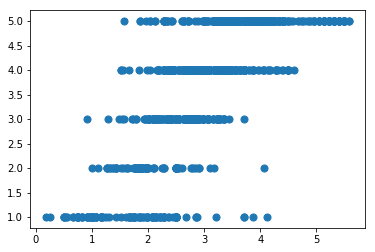

In [77]:
plt.scatter(QAll['Adj_Stars'], QAll['stars'], s=50)
plt.show()

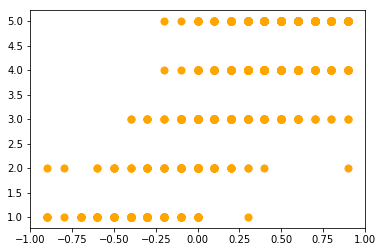

In [78]:
plt.scatter(QAll['sentiment'], QAll['stars'], s=50, color='orange')
plt.show()

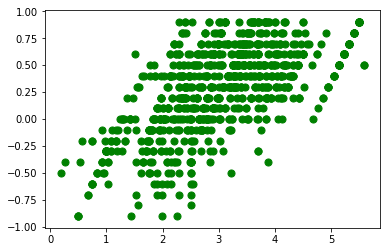

In [79]:
X = QAll[QAll['Reviews']>0]['Adj_Stars']
Y = QAll[QAll['Reviews']>0]['sentiment']
plt.scatter(X, Y, s=50, color='green')
plt.show()

0.40759367937221913


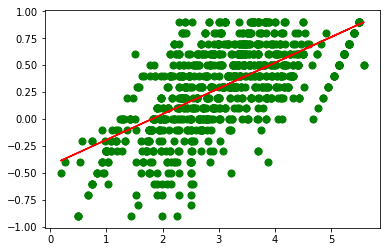

In [80]:
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))
Ypred = reg.predict(X)
plt.scatter(X, Y, s=50, color='green')
plt.plot(X, Ypred, color='red')
plt.show()

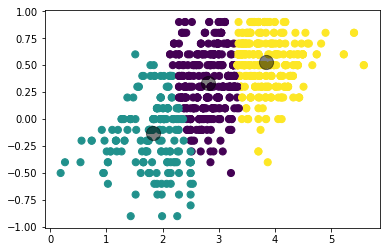

In [81]:
normSent = QAll[QAll['Reviews']>1][['Adj_Stars', 'sentiment']]

# Create k-means clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(normSent)
y_kmeans = kmeans.predict(normSent)

# Plot results
plt.scatter(normSent['Adj_Stars'], normSent['sentiment'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

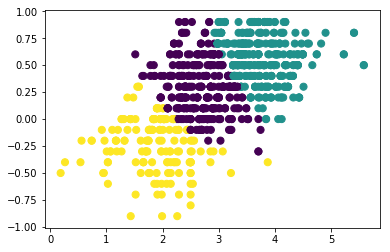

In [82]:
# Gaussian mixture model
gmm = mixture.GaussianMixture(
        n_components=3, covariance_type='full')
gmm.fit(normSent)
y_gmm = gmm.predict(normSent)

# Plot results
plt.scatter(normSent['Adj_Stars'], normSent['sentiment'], c=y_gmm, s=50, cmap='viridis')
plt.show()